In [8]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg


# Import KNN and dataset from sklearn
from sklearn import neighbors, datasets

#Import Iris dataset
iris = datasets.load_iris()

In [9]:
df = yf.download(tickers='BTC-USD DOGE-USD ETH-USD',start = '2021-07-17', end='2021-08-17',interval='5m')

[*********************100%***********************]  3 of 3 completed


In [10]:
df.head()

Adj Close                                Close  \
                                BTC-USD  DOGE-USD      ETH-USD       BTC-USD   
Datetime                                                                       
2021-07-16 19:30:00+01:00  32008.201172  0.178724  1923.126099  32008.201172   
2021-07-16 19:35:00+01:00  32013.480469  0.178945  1923.338989  32013.480469   
2021-07-16 19:40:00+01:00  31973.310547  0.178191  1918.901733  31973.310547   
2021-07-16 19:45:00+01:00  32039.705078  0.178596  1922.995972  32039.705078   
2021-07-16 19:50:00+01:00  31950.441406  0.177856  1917.022705  31950.441406   

                                                          High            \
                           DOGE-USD      ETH-USD       BTC-USD  DOGE-USD   
Datetime                                                                   
2021-07-16 19:30:00+01:00  0.178724  1923.126099  32008.201172  0.178883   
2021-07-16 19:35:00+01:00  0.178945  1923.338989  32018.822266  0.178945   
2021-07-16 19:40:00+01:00  0.178191  1918.901733  32030.287109  0.179062   
2021-07-16 19:45:00+01:00  0.178596  1922.995972  32039.705078  0.178622   
2021-07-16 19:50:00+01:00  0.177856  1917.022705  32033.927734  0.178370   

                                                 Low                         \
                               ETH-USD       BTC-USD  DOGE-USD      ETH-USD   
Datetime                                                                      
2021-07-16 19:30:00+01:00  1923.126099  31972.732422  0.178673  1920.478394   
2021-07-16 19:35:00+01:00  1924.087280  31994.105469  0.178891  1922.369263   
2021-07-16 19:40:00+01:00  1924.097656  31973.310547  0.178191  1918.901733   
2021-07-16 19:45:00+01:00  1923.688599  32001.986328  0.178485  1921.220581   
2021-07-16 19:50:00+01:00  1922.550171  31950.441406  0.177856  1917.022705   

                                   Open                          Volume  \
                                BTC-USD  DOGE-USD      ETH-USD  BTC-USD   
Datetime                                                                  
2021-07-16 19:30:00+01:00  31972.732422  0.178673  1920.478394        0   
2021-07-16 19:35:00+01:00  31994.105469  0.178901  1922.369263        0   
2021-07-16 19:40:00+01:00  32030.287109  0.179062  1924.097656        0   
2021-07-16 19:45:00+01:00  32001.986328  0.178485  1921.220581  1630208   
2021-07-16 19:50:00+01:00  32033.927734  0.178370  1922.550171        0   

                                            
                          DOGE-USD ETH-USD  
Datetime                                    
2021-07-16 19:30:00+01:00        0       0  
2021-07-16 19:35:00+01:00        0       0  
2021-07-16 19:40:00+01:00        0       0  
2021-07-16 19:45:00+01:00  1538048       0  
2021-07-16 19:50:00+01:00        0       0

In [11]:
df.tail()

Adj Close                                Close  \
                                BTC-USD  DOGE-USD      ETH-USD       BTC-USD   
Datetime                                                                       
2021-08-16 19:05:00+01:00  46393.585938  0.335112  3214.581055  46393.585938   
2021-08-16 19:10:00+01:00  46497.042969  0.336772  3227.589355  46497.042969   
2021-08-16 19:15:00+01:00  46626.285156  0.336904  3234.711426  46626.285156   
2021-08-16 19:20:00+01:00  46632.195312  0.336666  3231.608398  46632.195312   
2021-08-16 19:25:00+01:00  46570.414062  0.337126  3228.547119  46570.414062   

                                                          High            \
                           DOGE-USD      ETH-USD       BTC-USD  DOGE-USD   
Datetime                                                                   
2021-08-16 19:05:00+01:00  0.335112  3214.581055  46405.300781  0.335112   
2021-08-16 19:10:00+01:00  0.336772  3227.589355  46497.042969  0.336772   
2021-08-16 19:15:00+01:00  0.336904  3234.711426  46636.753906  0.337573   
2021-08-16 19:20:00+01:00  0.336666  3231.608398  46632.195312  0.336950   
2021-08-16 19:25:00+01:00  0.337126  3228.547119  46653.214844  0.337893   

                                                 Low                         \
                               ETH-USD       BTC-USD  DOGE-USD      ETH-USD   
Datetime                                                                      
2021-08-16 19:05:00+01:00  3214.581055  46390.488281  0.334562  3212.104248   
2021-08-16 19:10:00+01:00  3227.589355  46406.062500  0.335110  3216.638428   
2021-08-16 19:15:00+01:00  3235.580078  46502.664062  0.336904  3226.836670   
2021-08-16 19:20:00+01:00  3234.360352  46585.195312  0.336527  3231.052002   
2021-08-16 19:25:00+01:00  3234.140137  46570.414062  0.337032  3228.547119   

                                   Open                            Volume  \
                                BTC-USD  DOGE-USD      ETH-USD    BTC-USD   
Datetime                                                                    
2021-08-16 19:05:00+01:00  46405.300781  0.334562  3212.104248          0   
2021-08-16 19:10:00+01:00  46431.265625  0.335506  3218.936035   18771968   
2021-08-16 19:15:00+01:00  46537.902344  0.337262  3230.144287  129566720   
2021-08-16 19:20:00+01:00  46625.804688  0.336950  3234.360352          0   
2021-08-16 19:25:00+01:00  46653.214844  0.337893  3234.140137    7067648   

                                              
                          DOGE-USD   ETH-USD  
Datetime                                      
2021-08-16 19:05:00+01:00        0         0  
2021-08-16 19:10:00+01:00        0  56793088  
2021-08-16 19:15:00+01:00        0  48898048  
2021-08-16 19:20:00+01:00        0         0  
2021-08-16 19:25:00+01:00        0         0

In [5]:
df

Adj Close                                Close  \
                                BTC-USD  DOGE-USD      ETH-USD       BTC-USD   
Datetime                                                                       
2021-07-16 19:30:00+01:00  32008.201172  0.178724  1923.126099  32008.201172   
2021-07-16 19:35:00+01:00  32013.480469  0.178945  1923.338989  32013.480469   
2021-07-16 19:40:00+01:00  31973.310547  0.178191  1918.901733  31973.310547   
2021-07-16 19:45:00+01:00  32039.705078  0.178596  1922.995972  32039.705078   
2021-07-16 19:50:00+01:00  31950.441406  0.177856  1917.022705  31950.441406   
...                                 ...       ...          ...           ...   
2021-08-16 19:05:00+01:00  46393.585938  0.335112  3214.581055  46393.585938   
2021-08-16 19:10:00+01:00  46497.042969  0.336772  3227.589355  46497.042969   
2021-08-16 19:15:00+01:00  46626.285156  0.336904  3234.711426  46626.285156   
2021-08-16 19:20:00+01:00  46632.195312  0.336666  3231.608398  46632.195312   
2021-08-16 19:25:00+01:00  46570.414062  0.337126  3228.547119  46570.414062   

                                                          High            \
                           DOGE-USD      ETH-USD       BTC-USD  DOGE-USD   
Datetime                                                                   
2021-07-16 19:30:00+01:00  0.178724  1923.126099  32008.201172  0.178883   
2021-07-16 19:35:00+01:00  0.178945  1923.338989  32018.822266  0.178945   
2021-07-16 19:40:00+01:00  0.178191  1918.901733  32030.287109  0.179062   
2021-07-16 19:45:00+01:00  0.178596  1922.995972  32039.705078  0.178622   
2021-07-16 19:50:00+01:00  0.177856  1917.022705  32033.927734  0.178370   
...                             ...          ...           ...       ...   
2021-08-16 19:05:00+01:00  0.335112  3214.581055  46405.300781  0.335112   
2021-08-16 19:10:00+01:00  0.336772  3227.589355  46497.042969  0.336772   
2021-08-16 19:15:00+01:00  0.336904  3234.711426  46636.753906  0.337573   
2021-08-16 19:20:00+01:00  0.336666  3231.608398  46632.195312  0.336950   
2021-08-16 19:25:00+01:00  0.337126  3228.547119  46653.214844  0.337893   

                                                 Low                         \
                               ETH-USD       BTC-USD  DOGE-USD      ETH-USD   
Datetime                                                                      
2021-07-16 19:30:00+01:00  1923.126099  31972.732422  0.178673  1920.478394   
2021-07-16 19:35:00+01:00  1924.087280  31994.105469  0.178891  1922.369263   
2021-07-16 19:40:00+01:00  1924.097656  31973.310547  0.178191  1918.901733   
2021-07-16 19:45:00+01:00  1923.688599  32001.986328  0.178485  1921.220581   
2021-07-16 19:50:00+01:00  1922.550171  31950.441406  0.177856  1917.022705   
...                                ...           ...       ...          ...   
2021-08-16 19:05:00+01:00  3214.581055  46390.488281  0.334562  3212.104248   
2021-08-16 19:10:00+01:00  3227.589355  46406.062500  0.335110  3216.638428   
2021-08-16 19:15:00+01:00  3235.580078  46502.664062  0.336904  3226.836670   
2021-08-16 19:20:00+01:00  3234.360352  46585.195312  0.336527  3231.052002   
2021-08-16 19:25:00+01:00  3234.140137  46570.414062  0.337032  3228.547119   

                                   Open                            Volume  \
                                BTC-USD  DOGE-USD      ETH-USD    BTC-USD   
Datetime                                                                    
2021-07-16 19:30:00+01:00  31972.732422  0.178673  1920.478394          0   
2021-07-16 19:35:00+01:00  31994.105469  0.178901  1922.369263          0   
2021-07-16 19:40:00+01:00  32030.287109  0.179062  1924.097656          0   
2021-07-16 19:45:00+01:00  32001.986328  0.178485  1921.220581    1630208   
2021-07-16 19:50:00+01:00  32033.927734  0.178370  1922.550171          0   
...                                 ...       ...          ...        ...   
2021-08-16 19:05:00+01:00  46405.300781  0.3

In [6]:
df.to_csv('data123.csv')

In [7]:
df.to_csv('data123.csv',index=True)

In [15]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv')

In [16]:
df.to_csv(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data123.csv',index = True)

In [20]:
data = pd.read_csv("data123.csv")

In [24]:
data.to_excel("data123.xlsx",index = None,header=True)

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import statistics
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as rg
from sklearn.model_selection import train_test_split
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [2]:
df = pd.read_excel(r'C:\Users\anoop\Desktop\New folder\Westminster\dissertation\data.xlsx')

In [3]:
print(df)

                           Date  BTC-USD Adj Close  DOGE-USD Adj Close  \
0     2021-07-12 19:30:00+01:00        33160.36719            0.206758   
1     2021-07-12 19:35:00+01:00        33127.00781            0.206579   
2     2021-07-12 19:40:00+01:00        33145.07422            0.206643   
3     2021-07-12 19:45:00+01:00        33112.10156            0.206168   
4     2021-07-12 19:50:00+01:00        33088.93750            0.205759   
...                         ...                ...                 ...   
9881  2021-08-16 19:05:00+01:00        46393.58594            0.335112   
9882  2021-08-16 19:10:00+01:00        46497.04297            0.336772   
9883  2021-08-16 19:15:00+01:00        46626.28516            0.336904   
9884  2021-08-16 19:20:00+01:00        46632.19531            0.336666   
9885  2021-08-16 19:25:00+01:00        46570.41406            0.337126   

      ETH-USD Adj Close  BTC-USD Close  DOGE-USD Close  ETH-USD Close  \
0           2030.822388    33160.36719

In [4]:
data = pd.DataFrame(df)

In [5]:
data

,Date,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close,BTC-USD Close,DOGE-USD Close,ETH-USD Close,BTC-USD High,DOGE-USD High,ETH-USD High,BTC-USD Low,DOGE-USD Low,ETH-USD Low,BTC-USD Open,DOGE-USD Open,ETH-USD Open,BTC-USD Volume,DOGE-USD Volume,ETH-USD Volume
0,2021-07-12 19:30:00+01:00,33160.36719,0.206758,2030.822388,33160.36719,0.206758,2030.822388,33175.37500,0.206758,2032.222046,33160.36719,0.206688,2030.822388,33175.37500,0.206743,2031.223145,0,0,0
1,2021-07-12 19:35:00+01:00,33127.00781,0.206579,2028.344482,33127.00781,0.206579,2028.344482,33141.18359,0.206696,2029.620850,33127.00781,0.206579,2028.344482,33141.18359,0.206638,2029.620850,6418432,993024,0
2,2021-07-12 19:40:00+01:00,33145.07422,0.206643,2030.221924,33145.07422,0.206643,2030.221924,33153.35547,0.206671,2030.351563,33133.77734,0.206398,2028.552246,33153.35547,0.206671,2030.351563,21743616,546432,29700096
3,2021-07-12 19:45:00+01:00,33112.10156,0.206168,2029.833740,33112.10156,0.206168,2029.833740,33159.77734,0.206699,2032.032837,33112.10156,0.206168,2029.399170,33150.21484,0.206620,2031.390625,4126720,169088,0
4,2021-07-12 19:50:00+01:00,33088.93750,0.205759,2028.566284,33088.93750,0.205759,2028.566284,33128.37109,0.206386,2030.915771,33088.93750,0.205759,2028.068237,33128.37109,0.206386,2030.915771,7811072,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,2021-08-16 19:05:00+01:00,46393.58594,0.335112,3214.581055,46393.58594,0.335112,3214.581055,46405.30078,0.335112,3214.581055,46390.48828,0.334562,3212.104248,46405.30078,0.334562,3212.104248,0,0,0
9882,2021-08-16 19:10:00+01:00,46497.04297,0.336772,3227.589355,46497.04297,0.336772,3227.589355,46497.04297,0.336772,3227.589355,46406.06250,0.335110,3216.638428,46431.26563,0.335506,3218.936035,18771968,0,56793088
9883,2021-08-16 19:15:00+01:00,46626.28516,0.336904,3234.711426,46626.28516,0.336904,3234.711426,46636.75391,0.337573,3235.580078,46502.66406,0.336904,3226.836670,46537.90234,0.337262,3230.144287,129566720,0,48898048
9884,2021-08-16 19:20:00+01:00,46632.19531,0.336666,3231.608398,46632.19531,0.336666,3231.608398,46632.19531,0.336950,3234.360352,46585.19531,0.336527,3231.052002,46625.80469,0.336950,3234.360352,0,0,0


Text(0.5, 1.0, 'BTC-USD Adj Close')

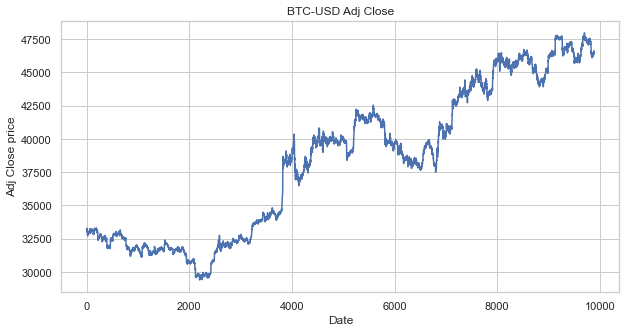

In [6]:
data['BTC-USD Adj Close'].plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Adj Close price")
plt.title("BTC-USD Adj Close")

## Augmented Dickey- Fuller Test - BTC-USD Adj Close 

In [56]:
#Augmented Dickey-Filler Test - 
X = data["BTC-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.375011
p-value: 0.914188
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


Text(0.5, 1.0, 'DOGE-USD Adj Close')

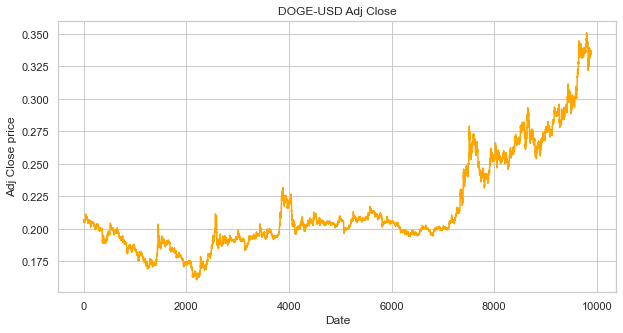

In [57]:
data['DOGE-USD Adj Close'].plot(figsize=(10,5),color = 'orange')
plt.xlabel("Date")
plt.ylabel("Adj Close price")
plt.title("DOGE-USD Adj Close")

## Augmented Dickey-Fuller Test - DOGE_USD Adj Close

In [59]:
#Augmented Dickey-Filler Test - 
X = data["DOGE-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: 0.769101
p-value: 0.991121
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


Text(0.5, 1.0, 'ETH-USD Adj Close')

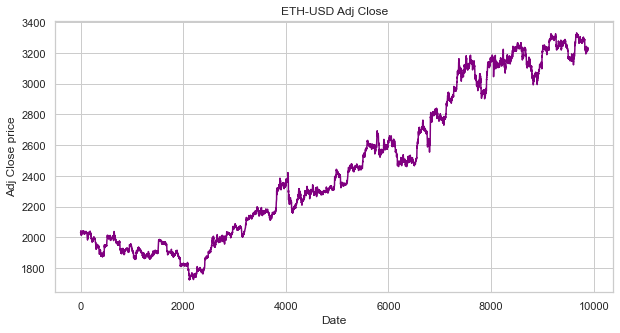

In [8]:
data['ETH-USD Adj Close'].plot(figsize=(10,5), color = 'purple')
plt.xlabel("Date")
plt.ylabel("Adj Close price")
plt.title("ETH-USD Adj Close")

## Augmented Dickey- Fuller Test ETH-USD Adj Close

In [60]:
#Augmented Dickey-Filler Test - 
X = data["ETH-USD Adj Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0]< result[4]["5%"]:
    print("Reject Ho - Time series in stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

ADF Statistic: -0.111379
p-value: 0.948293
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


In [9]:
data1 = df[['BTC-USD Adj Close','DOGE-USD Adj Close']]
data1

,BTC-USD Adj Close,DOGE-USD Adj Close
0,33160.36719,0.206758
1,33127.00781,0.206579
2,33145.07422,0.206643
3,33112.10156,0.206168
4,33088.93750,0.205759
...,...,...
9881,46393.58594,0.335112
9882,46497.04297,0.336772
9883,46626.28516,0.336904
9884,46632.19531,0.336666


In [10]:
data2 = df[['DOGE-USD Adj Close','ETH-USD Adj Close']]
data2

,DOGE-USD Adj Close,ETH-USD Adj Close
0,0.206758,2030.822388
1,0.206579,2028.344482
2,0.206643,2030.221924
3,0.206168,2029.833740
4,0.205759,2028.566284
...,...,...
9881,0.335112,3214.581055
9882,0.336772,3227.589355
9883,0.336904,3234.711426
9884,0.336666,3231.608398


In [11]:
data3 = df[['ETH-USD Adj Close','BTC-USD Adj Close']]
data3

,ETH-USD Adj Close,BTC-USD Adj Close
0,2030.822388,33160.36719
1,2028.344482,33127.00781
2,2030.221924,33145.07422
3,2029.833740,33112.10156
4,2028.566284,33088.93750
...,...,...
9881,3214.581055,46393.58594
9882,3227.589355,46497.04297
9883,3234.711426,46626.28516
9884,3231.608398,46632.19531


In [12]:
data4 = df[['Date','BTC-USD Adj Close','DOGE-USD Adj Close','ETH-USD Adj Close']]
data4.round(3)

,Date,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close
0,2021-07-12 19:30:00+01:00,33160.367,0.207,2030.822
1,2021-07-12 19:35:00+01:00,33127.008,0.207,2028.344
2,2021-07-12 19:40:00+01:00,33145.074,0.207,2030.222
3,2021-07-12 19:45:00+01:00,33112.102,0.206,2029.834
4,2021-07-12 19:50:00+01:00,33088.938,0.206,2028.566
...,...,...,...,...
9881,2021-08-16 19:05:00+01:00,46393.586,0.335,3214.581
9882,2021-08-16 19:10:00+01:00,46497.043,0.337,3227.589
9883,2021-08-16 19:15:00+01:00,46626.285,0.337,3234.711
9884,2021-08-16 19:20:00+01:00,46632.195,0.337,3231.608


In [22]:
#Returns
BTC_returns = np.log(data4['BTC-USD Adj Close']/data4['BTC-USD Adj Close'].shift(1))
BTC_returns

0            NaN
1      -0.001007
2       0.000545
3      -0.000995
4      -0.000700
          ...   
9881   -0.000277
9882    0.002228
9883    0.002776
9884    0.000127
9885   -0.001326
Name: BTC-USD Adj Close, Length: 9886, dtype: float64

In [14]:
DOGE_returns = np.log(data4['DOGE-USD Adj Close']/data4['DOGE-USD Adj Close'].shift(1))
DOGE_returns

0            NaN
1      -0.000867
2       0.000309
3      -0.002304
4      -0.001985
          ...   
9881    0.002230
9882    0.004941
9883    0.000390
9884   -0.000707
9885    0.001368
Name: DOGE-USD Adj Close, Length: 9886, dtype: float64

In [15]:
ETH_returns = np.log(data4['ETH-USD Adj Close']/data4['ETH-USD Adj Close'].shift(1))
ETH_returns

0            NaN
1      -0.001221
2       0.000925
3      -0.000191
4      -0.000625
          ...   
9881    0.000558
9882    0.004038
9883    0.002204
9884   -0.000960
9885   -0.000948
Name: ETH-USD Adj Close, Length: 9886, dtype: float64

In [86]:
#Correlation 
corrM = data4.corr()
corrM

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,1.000000,0.853944,0.969905
DOGE-USD Adj Close,0.853944,1.000000,0.873872
ETH-USD Adj Close,0.969905,0.873872,1.000000


In [66]:
#Covariance
data4.cov()

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close
BTC-USD Adj Close,3.105543e+07,182.077928,2.664980e+06
DOGE-USD Adj Close,1.820779e+02,0.001464,1.648553e+01
ETH-USD Adj Close,2.664980e+06,16.485525,2.431037e+05


In [67]:
data4.describe().round(2)

,BTC-USD Adj Close,DOGE-USD Adj Close,ETH-USD Adj Close
count,9886.00,9886.00,9886.00
mean,38351.50,0.22,2462.92
std,5572.74,0.04,493.06
min,29393.92,0.16,1722.51
25%,32452.37,0.19,1994.39
50%,38986.22,0.20,2346.66
75%,43466.93,0.24,2965.32
max,47982.38,0.35,3330.14


In [26]:
#Training and testing range
tint1 = data1[:2021-8-17]
tint1.columns = ['BTC-USD Adj Close','DOGE-USD Adj Close']
fint1 = data1[2021-7-13:]
fint1.columns = ['BTC-USD Adj Close','DOGE-USD Adj Close']

In [27]:
tbtc = tint1['BTC-USD Adj Close']
tdge = tint1['DOGE-USD Adj Close']
rtbtc = tbtc.pct_change(1).dropna()
rtdge = tdge.pct_change(1).dropna()


In [28]:
print('')
print('BTC-DOGE Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtbtc).join(rtdge).corr(), 4))
print('')


BTC-DOGE Returns Correlation

                    BTC-USD Adj Close  DOGE-USD Adj Close
BTC-USD Adj Close              1.0000              0.6386
DOGE-USD Adj Close             0.6386              1.0000



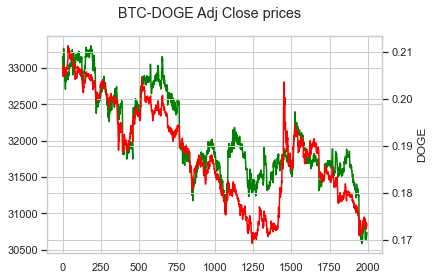

In [29]:
fig1,ax1 = plt.subplots()
ax1.plot(tbtc, color = 'green')
ax2 = ax1.twinx()
ax2.plot(tdge,color = 'red')
plt.ylabel('DOGE')
plt.xlabel('BTC')
plt.suptitle('BTC-DOGE Adj Close prices')
plt.show()


In [40]:
#Training and testing range
tint1 = data2[:2021-8-17]
tint1.columns = ['DOGE-USD Adj Close','ETH-USD Adj Close']
fint1 = data2[2021-7-13:]
fint1.columns = ['DOGE-USD Adj Close','ETH-USD Adj Close']

In [41]:
tdge= tint1['DOGE-USD Adj Close']
teth = tint1['ETH-USD Adj Close']
rtdge = tdge.pct_change(1).dropna()
rteth = teth.pct_change(1).dropna()

In [42]:
print('')
print('DOGE-ETH Returns Correlation')
print('')
print(np.round(pd.DataFrame(rtdge).join(rteth).corr(), 4))
print('')


DOGE-ETH Returns Correlation

                    DOGE-USD Adj Close  ETH-USD Adj Close
DOGE-USD Adj Close              1.0000             0.6435
ETH-USD Adj Close               0.6435             1.0000



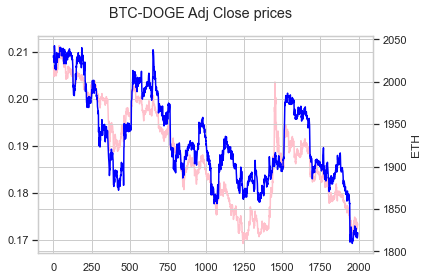

In [43]:
fig1,ax1 = plt.subplots()
ax1.plot(tdge, color = 'pink')
ax2 = ax1.twinx()
ax2.plot(teth,color = 'blue')
plt.ylabel('ETH')
plt.xlabel('DOGE')
plt.suptitle('BTC-DOGE Adj Close prices')
plt.show()


In [44]:
#Training and testing range
tint1 = data3[:2021-8-17]
tint1.columns = ['BTC-USD Adj Close','ETH-USD Adj Close']
fint1 = data3[2021-7-13:]
fint1.columns = ['BTC-USD Adj Close','ETH-USD Adj Close']

In [45]:
teth= tint1['ETH-USD Adj Close']
tbtc = tint1['BTC-USD Adj Close']
rteth = teth.pct_change(1).dropna()
rtbtc = tbtc.pct_change(1).dropna()

In [46]:
print('')
print('ETH-BTC Returns Correlation')
print('')
print(np.round(pd.DataFrame(rteth).join(rtbtc).corr(), 4))
print('')


ETH-BTC Returns Correlation

                   ETH-USD Adj Close  BTC-USD Adj Close
ETH-USD Adj Close             1.0000             0.8512
BTC-USD Adj Close             0.8512             1.0000



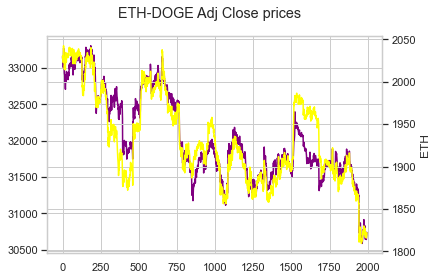

In [47]:
fig1,ax1 = plt.subplots()
ax1.plot(teth, color = 'purple')
ax2 = ax1.twinx()
ax2.plot(tbtc,color = 'yellow')
plt.ylabel('ETH')
plt.xlabel('DOGE')
plt.suptitle('ETH-DOGE Adj Close prices')
plt.show()


In [49]:
#Random Walk
tmax = 9886
t = 0
x = [0]
y = [0]
t_total = 0
dist = 0
while t<tmax:
    coord = random.randint(0,100)
    
    if coord == 0:
        direction = random.randint(0,1)
        direction = 2*direction-1
        x.append(x[t]+direction)
        y.append(y[t])
        
    
    else:
        direction =random.randint(0,1)
        direction = 2*direction-1
        y.append(y[t]+direction)
        x.append(x[t])
        
    cur_dist = x[t]*x[t] + y[t]*y[t]
    if cur_dist>dist:
        dist = cur_dist
        
    t = t+1
    
print("max distance was " +  str(math.sqrt(dist))) 
        
    

max distance was 154.11683879446787


In [ ]:
#ADF test
